In [1]:
from rejector.prediction import Prediction
from rejector.values import Values
from rejector.metric import Metric
from rejector.pdfs import PDFs
from rejector.pdf import PDF
import numpy as np
from typing import List
from matplotlib import pyplot
from tqdm import tqdm
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

In [2]:
predictions = []
# Add False Negatives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "negative", "positive", p, "positive", None)
    predictions.append(prediction)

# Add False Positives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "positive", "negative", p, "positive", None)
    predictions.append(prediction)

# Add True Negatives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "negative", "negative", p, "positive", None)
    predictions.append(prediction)

# Add True Positives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "positive", "positive", p, "positive", None)
    predictions.append(prediction)

In [3]:
kde = PDFs.estimator(predictions)
pdf = PDF(predictions, 1.0, kde)
print( pdf.integral(min=0.0, max=1.0))
print( pdf.integral(min=0.0, max=0.5))
print( pdf.integral(min=0.0, max=0.25))
print( pdf.integral(min=0.0, max=0.0))
print( pdf.integral(min=0.25, max=1.0))

c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.01415169]


0.9787979288370952
0.4893989644185475
0.40427446663252137
0.0
0.5743584674295481


INFO:root:Fraction of TPS: 0.25
INFO:root:Fraction of TNS: 0.25
INFO:root:Fraction of FPS: 0.25
INFO:root:Fraction of FNS: 0.25
INFO:root:KDE optimal bandwidths: [0.02018681]
INFO:root:KDE optimal bandwidths: [0.02018681]
INFO:root:KDE optimal bandwidths: [0.02018681]
INFO:root:KDE optimal bandwidths: [0.02018681]


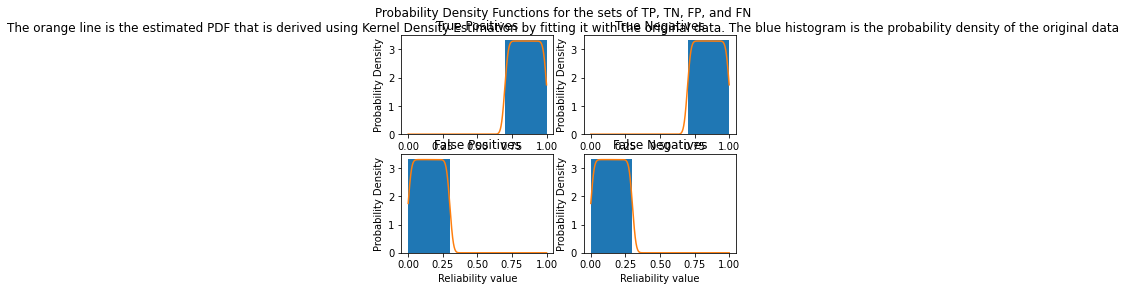

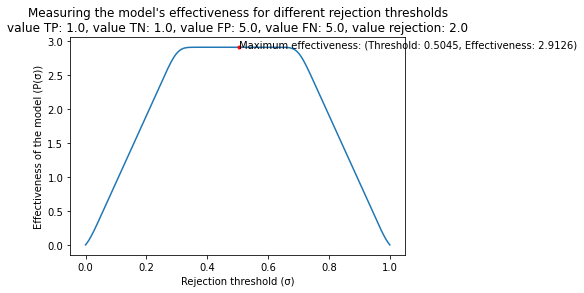

In [4]:
values = Values(value_TP=1.0, value_TN=1.0, value_FP=5.0, value_FN=5.0,value_rejection=2.0)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

INFO:root:Fraction of TPS: 0.23865755127408328
INFO:root:Fraction of TNS: 0.5966438781852083
INFO:root:Fraction of FPS: 0.08949658172778123
INFO:root:Fraction of FNS: 0.07520198881292728
c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.00618112]
INFO:root:KDE optimal bandwidths: [0.0072521]
INFO:root:KDE optimal bandwidths: [0.01152453]
INFO:root:KDE optimal bandwidths: [0.0133493]


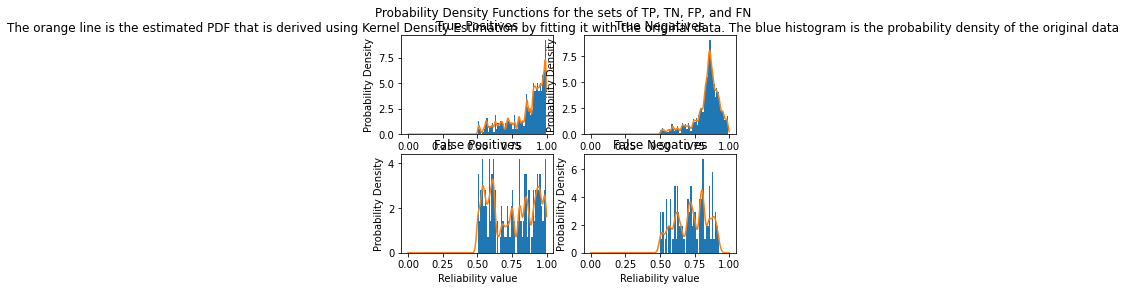

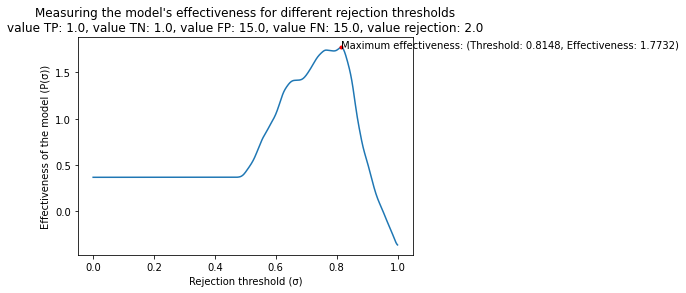

In [10]:
predictions = Prediction.load("input/cnn-hoseem-calibrated.p", gold_class="Hate")
values = Values(value_TP=1.0, value_TN=1.0, value_FP=15.0, value_FN=15.0,value_rejection=2.0)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

In [11]:
metric.calculate_effectiveness(0.0)

0.3658363207734904